In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
df = pd.read_csv("Rainfall_data.csv")
df

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14
...,...,...,...,...,...,...,...
247,2020,8,1,20.08,92.31,5.34,1203.09
248,2020,9,1,19.71,90.12,9.22,361.30
249,2020,10,1,18.43,82.69,12.62,180.18
250,2020,11,1,14.83,76.06,16.95,0.49


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               252 non-null    int64  
 1   Month              252 non-null    int64  
 2   Day                252 non-null    int64  
 3   Specific Humidity  252 non-null    float64
 4   Relative Humidity  252 non-null    float64
 5   Temperature        252 non-null    float64
 6   Precipitation      252 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 13.9 KB


In [111]:
df.describe()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
count,252.000000,252.000000,252.0,252.000000,252.000000,252.000000,252.000000
mean,2010.000000,6.500000,1.0,14.416746,67.259524,16.317262,206.798929
std,6.067351,3.458922,0.0,4.382599,17.307101,6.584842,318.093091
min,2000.000000,1.000000,1.0,5.740000,34.690000,4.730000,0.000000
25%,2005.000000,3.750000,1.0,10.010000,51.845000,10.865000,0.402500
50%,2010.000000,6.500000,1.0,15.200000,66.655000,16.915000,11.495000
75%,2015.000000,9.250000,1.0,18.875000,84.610000,22.115000,353.200000
max,2020.000000,12.000000,1.0,20.570000,92.310000,29.340000,1307.430000


#### Analyze Rainfall Trends Over Time

In [114]:
#Anual Rainfall 
Annual_Rainfall = df.groupby('Year')['Precipitation'].sum()

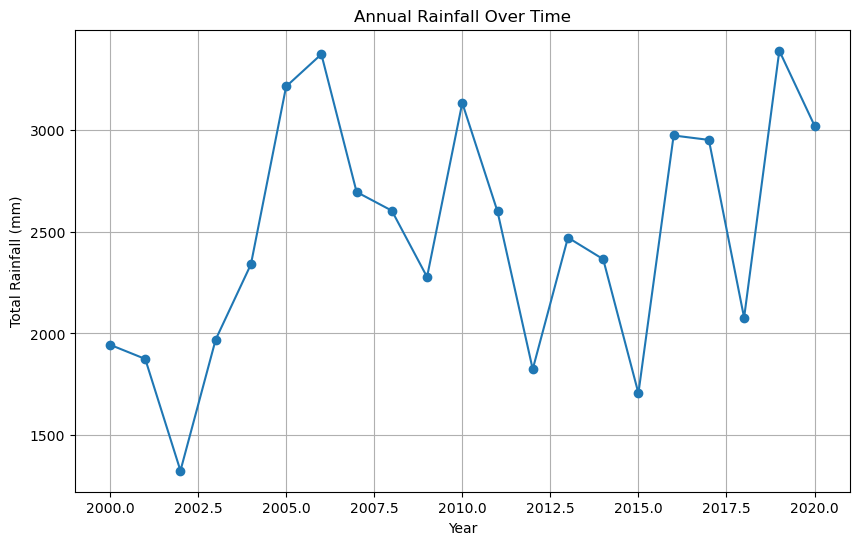

In [116]:
#Plot Annual Rainfall 
plt.figure(figsize=(10,6))
Anual_Rainfall.plot(kind = 'line', marker = 'o')
plt.title('Annual Rainfall Over Time')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.grid()

In [118]:
Monthly_Rainfall = df.groupby('Month')['Precipitation'].mean()

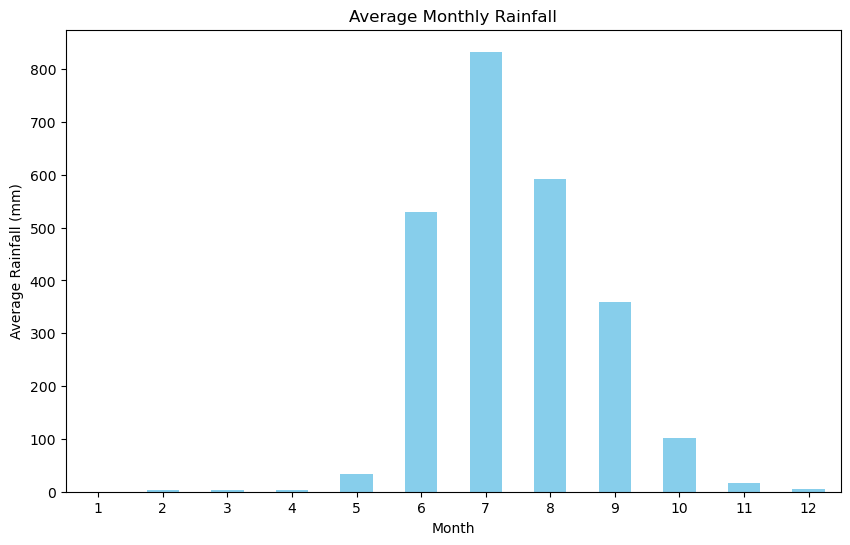

In [120]:
plt.figure(figsize=(10, 6))
Monthly_Rainfall.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.xticks(rotation=0)
plt.show()

In [122]:
df.columns

Index(['Year', 'Month', 'Day', 'Specific Humidity', 'Relative Humidity',
       'Temperature', 'Precipitation'],
      dtype='object')

In [124]:
corr = df[['Specific Humidity', 'Relative Humidity', 'Temperature', 'Precipitation']].corr()
corr

,Specific Humidity,Relative Humidity,Temperature,Precipitation
Specific Humidity,1.000000,0.914306,-0.905867,0.724540
Relative Humidity,0.914306,1.000000,-0.950889,0.743112
Temperature,-0.905867,-0.950889,1.000000,-0.779399
Precipitation,0.724540,0.743112,-0.779399,1.000000


In [126]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Metric')

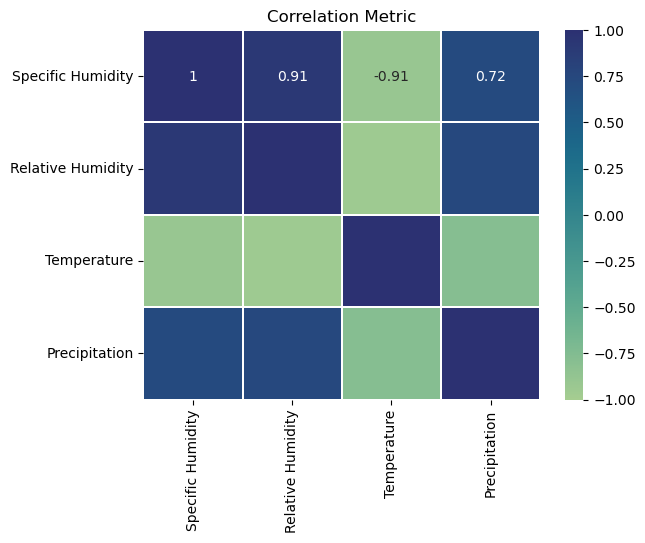

In [128]:
sns.heatmap(corr, annot = True, cmap ='crest' , vmin = -1, vmax = 1, linewidths=.2)
plt.title("Correlation Metric")

#### Seasonal Pattern

In [131]:
#filter data from monsoon Month
Monsoon_df = df[df['Month'].isin([6,7,8,9])]
Monsoon_df.head()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
5,2000,6,1,19.53,84.19,7.91,313.67
6,2000,7,1,18.80,88.50,6.67,820.45
7,2000,8,1,18.86,88.44,7.07,362.38
8,2000,9,1,18.43,86.12,10.63,97.85
17,2001,6,1,19.10,81.94,9.83,510.09


In [133]:
monsoon_rainfall = Monsoon_df.groupby('Year')['Precipitation'].sum()

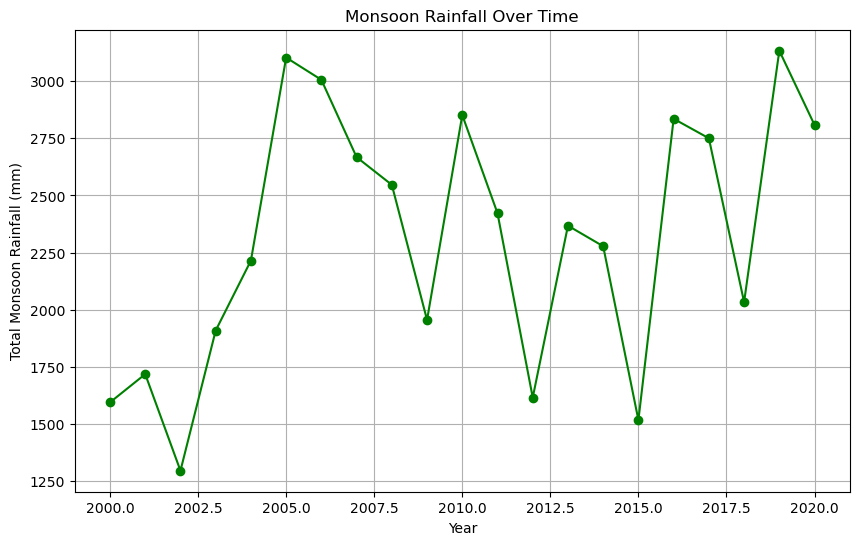

In [135]:
plt.figure(figsize=(10, 6))
monsoon_rainfall.plot(kind='line', marker='o', color='green')
plt.title('Monsoon Rainfall Over Time')
plt.xlabel('Year')
plt.ylabel('Total Monsoon Rainfall (mm)')
plt.grid()

Text(0.5, 1.0, 'Boxplot of Precipitation')

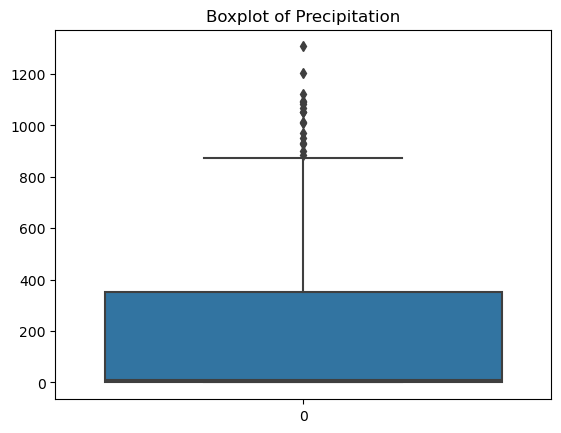

In [137]:
sns.boxplot(df['Precipitation'])
plt.title('Boxplot of Precipitation')

In [139]:
df['Precipitation'].quantile(0.95)

940.0364999999998

In [141]:
extreme_rainfall = df[ df['Precipitation'] > df['Precipitation'].quantile(0.95)]
extreme_rainfall

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
55,2004,8,1,18.98,90.62,5.70,949.59
66,2005,7,1,20.14,91.12,4.91,1095.38
78,2006,7,1,19.41,91.12,4.73,1122.56
79,2006,8,1,18.86,91.56,5.13,1052.65
114,2009,7,1,19.84,90.44,5.26,1052.50
126,2010,7,1,20.39,91.50,6.21,1068.20
138,2011,7,1,19.71,90.06,7.24,1093.05
174,2014,7,1,19.65,86.69,9.27,1307.43
198,2016,7,1,19.71,91.19,5.20,1009.40
210,2017,7,1,19.84,89.94,5.37,1012.11


In [143]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [145]:
# Resample data to monthly frequency
monthly_df = df.groupby(['Year', 'Month']).agg({'Precipitation': 'sum'}).reset_index()
monthly_df['Date'] = pd.to_datetime(monthly_df[['Year', 'Month']].assign(DAY=1))
monthly_df.set_index('Date', inplace=True)

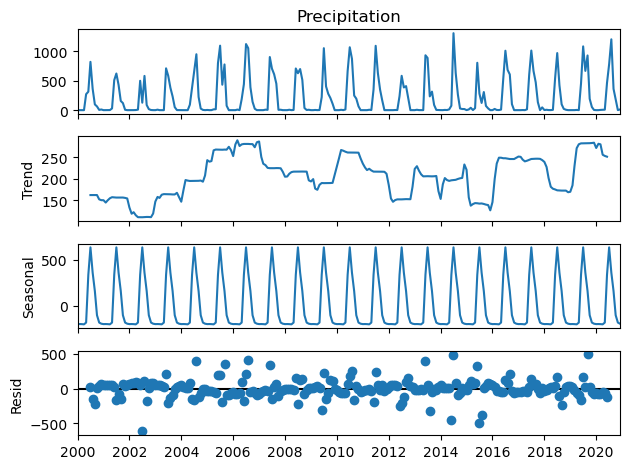

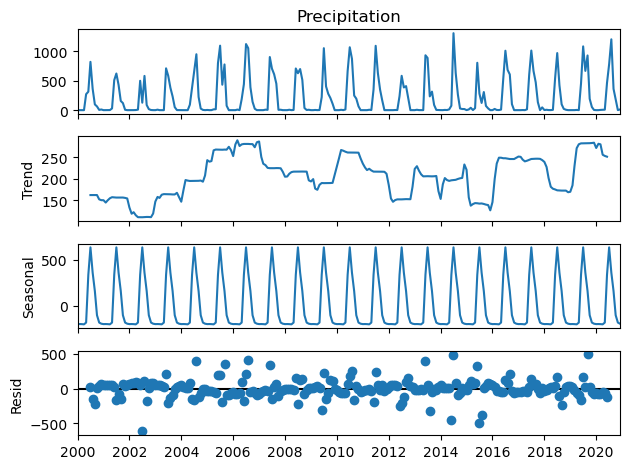

In [147]:
#Decompose time series
decomposition = seasonal_decompose(monthly_df['Precipitation'], model='additive', period=12)
decomposition.plot()

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

In [167]:
X = df[['Specific Humidity', 'Relative Humidity', 'Temperature']]
y = df['Precipitation']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [171]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [173]:
y_pred = model.predict(X_test)

In [175]:
rmse =root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {rmse}, R²: {r2}')

MSE: 193.23906389559792, R²: 0.5901603563614706


### Randam Forest Regressor

In [177]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [181]:
y_pred_rf  = model_rf.predict(X_test)

In [185]:
rmse_rf =root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Model Evaluation of Randam Forest Regressor:\n RMSE: {rmse_rf}, R²: {r2_rf}')

Model Evaluation of Randam Forest Regressor:
 RMSE: 120.15854738896871, R²: 0.8415349637940618


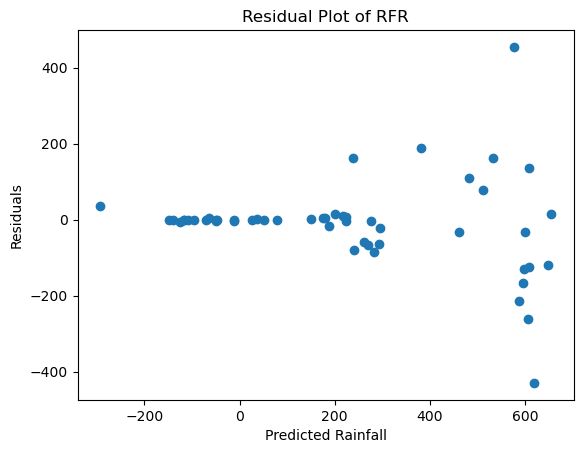

In [236]:
residual2 = y_test - y_pred_rf
plt.scatter(y_pred, residual2)
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.title('Residual Plot of RFR')
plt.show()

#### Hyperparameter Tuning

In [189]:
from sklearn.model_selection import GridSearchCV

In [192]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [194]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [195]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}

In [208]:
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=20, min_samples_split=5)

In [210]:
y_pred_gen = best_model.predict(X_test)

In [214]:
rmse_gen = root_mean_squared_error(y_test, y_pred_gen)
r2_gen = r2_score(y_test, y_pred_gen)
print(f' Genelize Score After Hyperparameter Tunning:\n RMSE: {rmse_gen}, R2: {r2_gen}')

 Genelize Score After Hyperparameter Tunning:
 RMSE: 119.2237185029762, R2: 0.8439910760505469


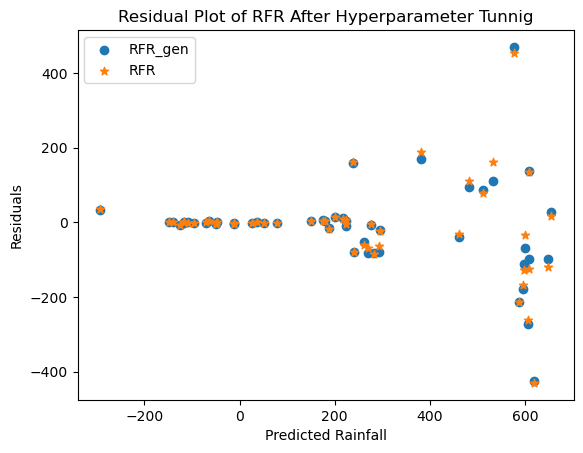

In [244]:
residual1 = y_test - y_pred_gen
plt.scatter(y_pred, residual1, marker="o", label="RFR_gen")
plt.scatter(y_pred, residual2, marker = "*", label = "RFR")
plt.legend()
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.title('Residual Plot of RFR After Hyperparameter Tunnig')
plt.show()

In [220]:
from xgboost import XGBRegressor

model_X = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)
model_X.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [222]:
y_pred_X = model_X.predict(X_test)

In [224]:
rmse_X = root_mean_squared_error(y_test, y_pred_X)
r2_X = r2_score(y_test, y_pred_X)
print(f' Model Evaluation of XGBRegressor:\n RMSE: {rmse_X}, R2: {r2_X}')

 Model Evaluation of XGBRegressor:
 RMSE: 154.60391662615186, R2: 0.7376596467775496


In [226]:
from sklearn.ensemble import VotingRegressor
model1 = RandomForestRegressor()
model2 = XGBRegressor()
ensemble = VotingRegressor(estimators=[('rf', model1), ('xgb', model2)])
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...))])

In [228]:
y_pred_en = ensemble.predict(X_test)

In [230]:
rmse_en = root_mean_squared_error(y_test, y_pred_en)
r2_en = r2_score(y_test, y_pred_en)
print(f' Model Evaluation of XGBRegressor:\n RMSE: {rmse_en}, R2: {r2_en}')

 Model Evaluation of XGBRegressor:
 RMSE: 139.48985213113502, R2: 0.7864451971920094


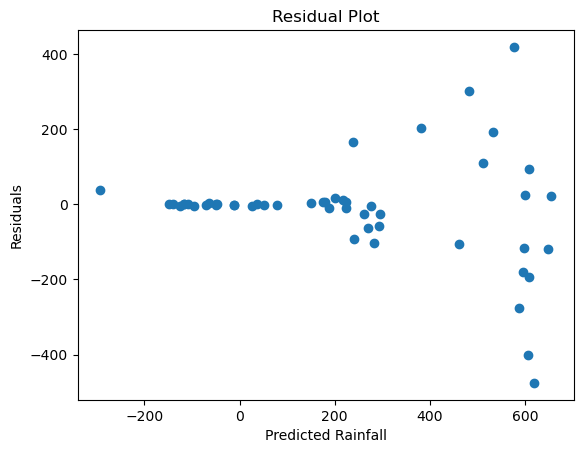

In [232]:
residuals = y_test - y_pred_en
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [246]:
import pickle
with open('tuned_random_forest.pkl', 'wb') as file:
    pickle.dump(best_model, file)


In [248]:
with open('random_forest.pkl', 'wb') as file:
    pickle.dump(model_rf, file)